In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import re
import unicodedata
import datetime
import itertools
%matplotlib inline

In [2]:
# Read in one link
game_gini = pd.read_excel('data/game_ginis/game_gini_2017_mp2.xlsx')

In [6]:
game_gini.head()

,date,g_id,g_num,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,opp,team,season
0,2017-01-02,201701020CHI,35,0.398791,0.073116,0.277656,0.306659,0.302640,0.288699,0.330913,0.366787,0.398791,CHI,CHH,2017
1,2017-04-12,201704120BOS,82,0.264407,0.060914,0.079346,0.114317,0.132158,0.145899,0.158282,0.186306,0.203485,MIL,BOS,2017
2,2016-12-31,201612310CHI,34,0.495763,0.390095,0.316069,0.280085,0.284614,0.308653,0.367345,0.404165,0.436586,MIL,CHI,2017
3,2016-12-01,201612010CLE,17,0.607944,0.088990,0.292906,0.415799,0.475418,0.517759,0.539882,0.554092,0.570660,LAC,CLE,2017
4,2016-12-30,201612300WAS,32,0.296629,0.050960,0.169871,0.184900,0.176326,0.170345,0.177649,0.219552,0.247642,WAS,BRK,2017


In [23]:
# Team specific
team = 'CHH'
team_gini = game_gini[game_gini['team'] == team]

In [24]:
team_gini.head()

,date,g_id,g_num,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,opp,team,season,gini_avg_9
0,2017-01-02,201701020CHI,35,0.398791,0.073116,0.277656,0.306659,0.302640,0.288699,0.330913,0.366787,0.398791,CHI,CHH,2017,0.416335
11,2016-11-02,201611020CHO,4,0.446522,0.044211,0.182564,0.215722,0.258574,0.271020,0.295857,0.335563,0.377338,PHI,CHH,2017,0.416335
29,2016-12-20,201612200CHO,29,0.562122,0.290974,0.354979,0.360599,0.357541,0.365265,0.409384,0.461718,0.514222,LAL,CHH,2017,0.416335
151,2017-03-10,201703100CHO,65,0.334249,0.200050,0.156385,0.128482,0.160214,0.175322,0.208848,0.230229,0.269138,ORL,CHH,2017,0.416335
183,2017-02-25,201702250SAC,58,0.449772,0.012467,0.066077,0.073280,0.179627,0.248033,0.310715,0.383838,0.449772,SAC,CHH,2017,0.416335


In [25]:
np.mean(team_gini['gini_9'])

0.4163350665579311

In [17]:
season_avg_gini_lst = []
for team in game_gini['team']:
    team_gini = game_gini[game_gini['team'] == team]
    season_avg_gini_lst.append(np.mean(team_gini['gini_9']))
game_gini['gini_avg_9'] = season_avg_gini_lst

In [18]:
game_gini.head()

,date,g_id,g_num,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,opp,team,season,gini_avg_9
0,2017-01-02,201701020CHI,35,0.398791,0.073116,0.277656,0.306659,0.302640,0.288699,0.330913,0.366787,0.398791,CHI,CHH,2017,0.416335
1,2017-04-12,201704120BOS,82,0.264407,0.060914,0.079346,0.114317,0.132158,0.145899,0.158282,0.186306,0.203485,MIL,BOS,2017,0.462549
2,2016-12-31,201612310CHI,34,0.495763,0.390095,0.316069,0.280085,0.284614,0.308653,0.367345,0.404165,0.436586,MIL,CHI,2017,0.423901
3,2016-12-01,201612010CLE,17,0.607944,0.088990,0.292906,0.415799,0.475418,0.517759,0.539882,0.554092,0.570660,LAC,CLE,2017,0.509389
4,2016-12-30,201612300WAS,32,0.296629,0.050960,0.169871,0.184900,0.176326,0.170345,0.177649,0.219552,0.247642,WAS,BRK,2017,0.339370


In [75]:
game_gini['diff_from_avg'] = [abs(avg - game)**(0.5) for avg, game in zip(game_gini['gini_avg_9'], game_gini['gini_9'])]

In [76]:
game_gini.head()

,date,g_id,g_num,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,opp,team,season,gini_avg_9,diff_from_avg
0,2017-01-02,201701020CHI,35,0.398791,0.073116,0.277656,0.306659,0.302640,0.288699,0.330913,0.366787,0.398791,CHI,CHH,2017,0.416335,0.132453
1,2017-04-12,201704120BOS,82,0.264407,0.060914,0.079346,0.114317,0.132158,0.145899,0.158282,0.186306,0.203485,MIL,BOS,2017,0.462549,0.508983
2,2016-12-31,201612310CHI,34,0.495763,0.390095,0.316069,0.280085,0.284614,0.308653,0.367345,0.404165,0.436586,MIL,CHI,2017,0.423901,0.112628
3,2016-12-01,201612010CLE,17,0.607944,0.088990,0.292906,0.415799,0.475418,0.517759,0.539882,0.554092,0.570660,LAC,CLE,2017,0.509389,0.247528
4,2016-12-30,201612300WAS,32,0.296629,0.050960,0.169871,0.184900,0.176326,0.170345,0.177649,0.219552,0.247642,WAS,BRK,2017,0.339370,0.302867


In [85]:
team = 'SAS'
team_as_opp = game_gini[game_gini['opp'] == team]

In [86]:
np.mean(team_as_opp['diff_from_avg'])

0.25690588235051004

In [97]:
def get_dgini(df, team):
    team_as_opp = df[df['opp'] == team]
    return np.mean(team_as_opp['diff_from_avg'])

In [98]:
get_dgini(game_gini, 'SAS')

0.25690588235051004

## Plot defensive Gini vs. playoff success

In [99]:
s_res = pd.read_excel('data/nba_results.xlsx')

In [100]:
yr = 2017
season_df = s_res[s_res['yr'] == yr]

In [101]:
season_df.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1


In [102]:
dgini_lst = []
for abbr in season_df['abbr']:
    dgini_lst.append(get_dgini(game_gini, abbr))
season_df['dgini'] = dgini_lst

/Users/danielalpert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [103]:
season_df

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,dgini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.235950
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.237469
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.241559
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.226881
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.239362
5,Milwaukee Bucks,42,40,0.512,40,42,103.6,103.8,2017,MIL,1,0.217389
6,Indiana Pacers,42,40,0.512,40,42,105.1,105.3,2017,IND,1,0.236805
7,Chicago Bulls,41,41,0.500,42,40,102.9,102.4,2017,CHI,1,0.238602
8,Miami Heat,41,41,0.500,44,38,103.2,102.1,2017,MIA,0,0.236361
9,Detroit Pistons,37,45,0.451,38,44,101.3,102.5,2017,DET,0,0.240281


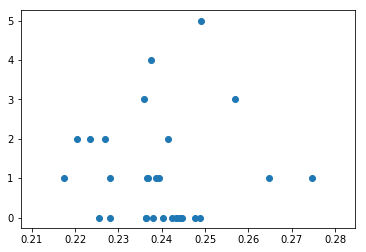

In [111]:
plt.scatter(season_df['dgini'], season_df['playoffs'])
plt.show()

In [112]:
links = ['data/game_ginis/game_gini_' + str(yr) + '_mp2.xlsx' for yr in range(2003,2018)]

In [114]:
links[0][26:30]

'2003'

In [118]:
df_list = []
#plt.figure(figsize=(10,5))

k = 9
var = 'gini_' + str(k)
links = ['data/game_ginis/game_gini_' + str(yr) + '_mp2.xlsx' for yr in range(2003,2018)]

for link in links:
    yr = int(link[26:30])
    game_gini = pd.read_excel(link)
    
    # add an average gini next to each team
    season_avg_gini_lst = []
    for team in game_gini['team']:
        team_gini = game_gini[game_gini['team'] == team]
        season_avg_gini_lst.append(np.mean(team_gini[var]))
    game_gini['gini_avg_9'] = season_avg_gini_lst
    # calcukate difference between game gini and avg gini for each game
    game_gini['diff_from_avg'] = [abs(avg - game)**(1) for avg, game in zip(game_gini['gini_avg_9'], game_gini[var])]
    
    # read in NBA results
    s_res = pd.read_excel('data/nba_results.xlsx')
    # isolate given year
    season_df = s_res[s_res['yr'] == yr]
    dgini_lst = []
    for abbr in season_df['abbr']:
        dgini_lst.append(get_dgini(game_gini, abbr))
    season_df['dgini'] = dgini_lst

    #plt.scatter(season_df['dgini'], season_df['playoffs'])
    df_list.append(season_df)
    
#plt.show()
dgini_df = pd.concat(df_list)

/Users/danielalpert/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
dgini_df

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,dgini
419,New Jersey Nets,49,33,0.598,56,26,95.4,90.1,2003,NJN,4,0.066421
420,Philadelphia 76ers,48,34,0.585,48,34,96.8,94.5,2003,PHI,2,0.061610
421,Boston Celtics,44,38,0.537,40,42,92.7,93.1,2003,BOS,2,0.068842
422,Orlando Magic,42,40,0.512,41,41,98.5,98.4,2003,ORL,1,0.061869
423,New York Knicks,37,45,0.451,37,45,95.9,97.2,2003,NYK,0,0.062691
424,Washington Wizards,37,45,0.451,38,44,91.5,92.5,2003,WAS,0,0.059115
425,Miami Heat,25,57,0.305,25,57,85.6,90.6,2003,MIA,0,0.065029
426,Detroit Pistons,50,32,0.610,52,30,91.4,87.7,2003,DET,3,0.066450
427,Indiana Pacers,48,34,0.585,51,31,96.8,93.3,2003,IND,1,0.060695
428,New Orleans Hornets,47,35,0.573,47,35,93.9,91.8,2003,NOH,1,0.068494


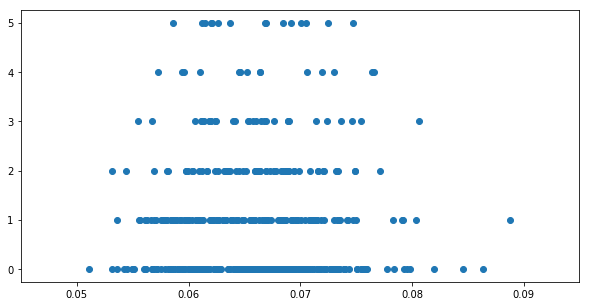

In [120]:
plt.figure(figsize=(10,5))
plt.scatter(dgini_df['dgini'], dgini_df['playoffs'])
plt.show()

In [121]:
c5 = dgini_df[dgini_df['playoffs'] == 5]
c4 = dgini_df[dgini_df['playoffs'] == 4]
c3 = dgini_df[dgini_df['playoffs'] == 3]
c2 = dgini_df[dgini_df['playoffs'] == 2]
c1 = dgini_df[dgini_df['playoffs'] == 1]
c0 = dgini_df[dgini_df['playoffs'] == 0]

In [134]:
print np.var(c5['dgini'])
print np.var(c4['dgini'])
print np.var(c3['dgini'])
print np.var(c2['dgini'])
print np.var(c1['dgini'])
print np.var(c0['dgini'])

import scipy.stats
print scipy.stats.iqr(c5['dgini'])
print scipy.stats.iqr(c4['dgini'])
print scipy.stats.iqr(c3['dgini'])
print scipy.stats.iqr(c2['dgini'])
print scipy.stats.iqr(c1['dgini'])
print scipy.stats.iqr(c0['dgini'])

2.13067776692e-05
3.43490575182e-05
3.05123939616e-05
2.59234389008e-05
3.81469334601e-05
3.84726709412e-05
0.00759124197984
0.00853898428466
0.00698194475915
0.00633907946335
nan
nan


/Users/danielalpert/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [108]:
game_gini.head()

,date,g_id,g_num,gini_10,gini_2,gini_3,gini_4,gini_5,gini_6,gini_7,gini_8,gini_9,opp,team,season,gini_avg_9
0,2003-01-20,200301200NYK,39,0.571551,0.413203,0.415822,0.426961,0.411157,0.408177,0.419977,0.462596,0.517995,MIA,NYK,2003,0.489977
1,2003-01-17,200301170DEN,39,0.548925,0.286367,0.248595,0.217609,0.317703,0.390237,0.442998,0.486486,0.515693,CLE,DEN,2003,0.421367
2,2003-04-05,200304050CHI,77,0.616048,0.236509,0.184107,0.278255,0.302861,0.392473,0.455795,0.519566,0.568880,MIL,CHI,2003,0.506188
3,2003-03-11,200303110NYK,63,0.493934,0.044519,0.120180,0.159300,0.233726,0.316799,0.369994,0.439561,0.493934,NYK,MEM,2003,0.396127
4,2003-01-08,200301080UTA,34,0.504254,0.184042,0.246517,0.322625,0.356151,0.371337,0.393906,0.415897,0.463370,PHO,UTA,2003,0.447947
